Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Splitting data to train and test

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

Checking data shape

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

Visualising

In [5]:
def plot_sample(index):
    plt.figure(figsize=(1,2))
    plt.imshow(x_train[index])

In [6]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

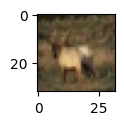

In [7]:
plot_sample(3)

In [8]:
y_train[3]

array([4], dtype=uint8)

In [9]:
classes[y_train[3][0]]

'deer'

Scaling of data

In [10]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [11]:
x_train_scaled.shape

(50000, 32, 32, 3)

One-hot-encoding the classes

In [12]:
from numpy import dtype


y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)

In [13]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)

In [14]:
y_test[3]

array([0], dtype=uint8)

In [15]:
y_test[3][0]

0

In [16]:
y_test_categorical[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

Building the model

In [18]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(5000,activation='relu'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

Compiling the model

In [19]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Fitting the model to data

In [21]:
model.fit(x_train_scaled,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 148s 94ms/step - loss: 1.7012 - accuracy: 0.3987
Epoch 2/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.5835 - accuracy: 0.4406
Epoch 3/10
1563/1563 [==============================] - 105s 67ms/step - loss: 1.5119 - accuracy: 0.4658
Epoch 4/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4592 - accuracy: 0.4854
Epoch 5/10
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4131 - accuracy: 0.5012
Epoch 6/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.3763 - accuracy: 0.5165
Epoch 7/10
1563/1563 [==============================] - 115s 73ms/step - loss: 1.3366 - accuracy: 0.5304
Epoch 8/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.3004 - accuracy: 0.5416
Epoch 9/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.2716 - accuracy: 0.5527
Epoch 10/10
1563/1563 [==============================] 

Checking loss and accuracy

In [22]:
loss,accuracy=model.evaluate(x_test_scaled,y_test_categorical)
loss
accuracy

313/313 [==============================] - 7s 21ms/step - loss: 1.4284 - accuracy: 0.4949


0.4948999881744385

Checking predicting

In [23]:
y_predicted=model.predict(x_test_scaled)

313/313 [==============================] - 6s 18ms/step


In [24]:
y_prediction_labels=[np.argmax(i) for i in y_predicted]

In [25]:
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [26]:
y_test[5]

array([6], dtype=uint8)

In [27]:
classes[y_prediction_labels[5]]

'frog'

Confusion matrix

In [28]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_prediction_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[430,  36,  48,  33,   4,  29,  16,  90, 121, 193],
       [  5, 576,   7,  11,   1,  30,  12,  28,  19, 311],
       [ 57,  20, 398,  81,  27, 154,  44, 153,  14,  52],
       [ 13,  16,  67, 312,  12, 279,  86, 102,  17,  96],
       [ 28,  15, 206,  62, 219, 112,  86, 203,  13,  56],
       [  9,   8,  63, 160,  17, 494,  51, 136,  18,  44],
       [  3,  10, 107,  98,  32, 122, 495,  69,   9,  55],
       [  8,  11,  33,  33,  15,  82,  15, 725,   3,  75],
       [ 51,  76,  10,  20,   5,  46,   1,  40, 540, 211],
       [  8, 105,   4,  17,   1,  18,  12,  68,   7, 760]])>

<AxesSubplot: >

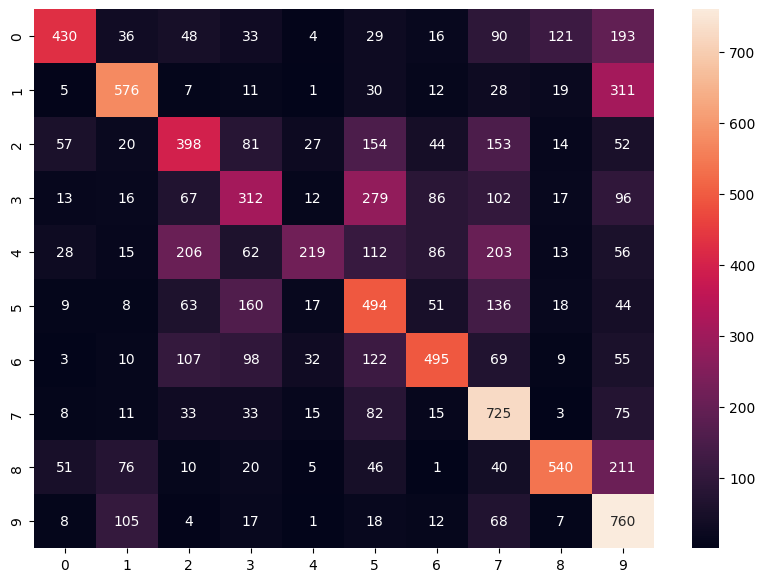

In [29]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')